Name:- Shingala Prince C.

**Roll no:- 23BEC184**

Div:- G-(G2)



Enter the ticker symbol for the first stock: NVDA
Enter the ticker symbol for the second stock: AAPL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Statistical Analysis:
      count            sum         min         max        mean      median  \
NVDA    562  182244.259918  112.269997  950.020020  324.278043  262.199997   
AAPL    562   93092.500023  125.019997  198.110001  165.645018  167.600006   

            mode      variance  std deviation  
NVDA  131.759995  35111.668072     187.381077  
AAPL  175.839996    317.175937      17.809434  

Unique Value Counts:
NVDA    558
AAPL    539
dtype: int64

Unique Values:
NVDA: [301.20999146 292.8999939  276.04000854 281.77999878 272.47000122
 274.         278.17001343 279.98999023 265.75       269.42001343
 259.02999878 250.66999817 241.5        233.74000549 233.72000122
 223.24000549 227.72000122 219.44000244 228.3999939  244.86000061
 246.38000488 252.41999817 239.47999573 243.19000244 247.27999878
 251.08000183 267.04998779 258.23999023 239.49000549 242.66999817
 264.95001221 265.10998535 245.07000732 236.41999817 233.8999939
 223.86999512 237.47999573 241.57000732 243.8500061  234.

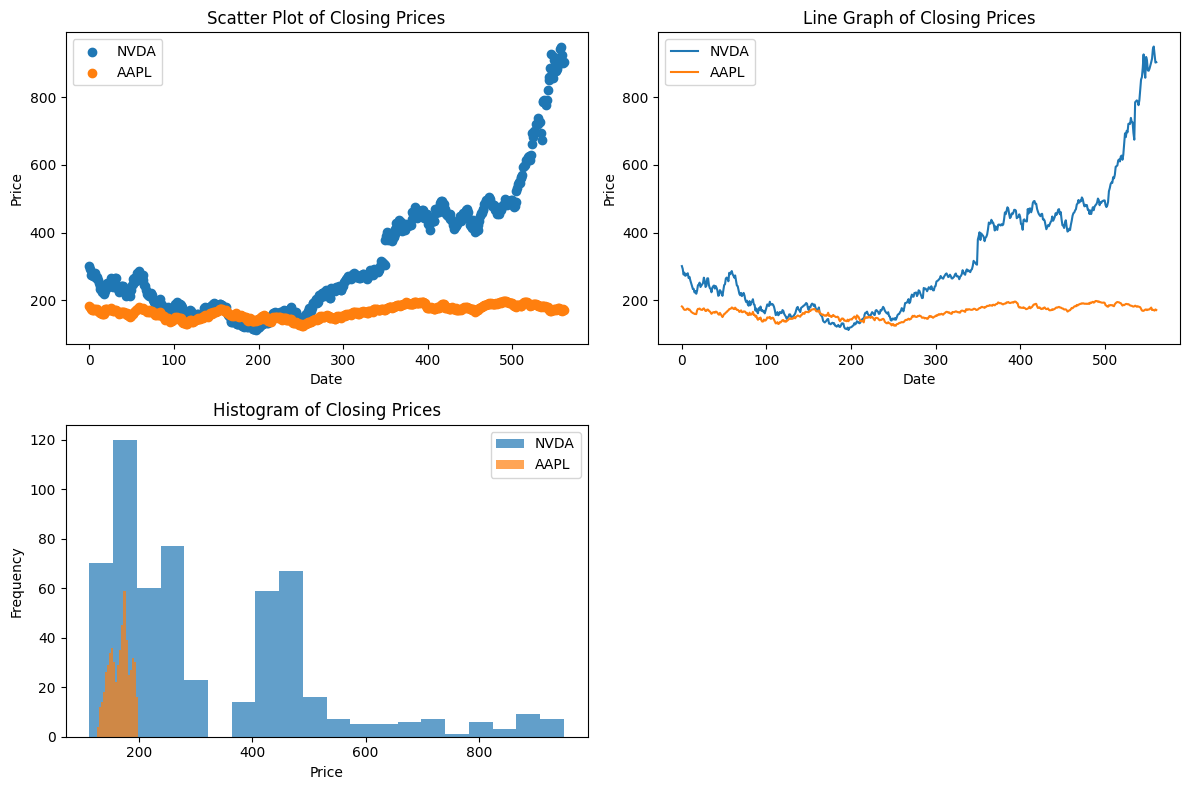

Predicted Closing Price of NVDA for the Next Day: 510.11199645996095
Predicted Closing Price of AAPL for the Next Day: 174.13399963378907

Metrics for NVDA:
Mean Absolute Error (MAE): 62.870273546646516
Mean Squared Error (MSE): 11456.403256615653
Root Mean Squared Error (RMSE): 107.03458906641185
Mean Absolute Percentage Error (MAPE): 18.700562499955115%

Metrics for AAPL:
Mean Absolute Error (MAE): 4.991569649367146
Mean Squared Error (MSE): 40.75390149446677
Root Mean Squared Error (RMSE): 6.383878248718937


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to take user input for ticker symbols
def get_user_input():
    ticker1 = input("Enter the ticker symbol for the first stock: ").upper()
    ticker2 = input("Enter the ticker symbol for the second stock: ").upper()
    return ticker1, ticker2

# Load data
start_date = '2022-01-01'
end_date = '2024-04-01'

# Get user input for ticker symbols
ticker1, ticker2 = get_user_input()

# Download data
data1 = yf.download(ticker1, start=start_date, end=end_date)['Close']
data2 = yf.download(ticker2, start=start_date, end=end_date)['Close']

# Combine the two dataframes
data = pd.concat([data1, data2], axis=1)
data.columns = [ticker1, ticker2]

# Drop null records
data.dropna(inplace=True)

# Check if there are samples available
if data.shape[0] > 0:
    # Replace NA values in numerical columns with mean and categorical columns with mode
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    # Statistical analysis
    statistics = {
        'count': data.count(),
        'sum': data.sum(),
        'min': data.min(),
        'max': data.max(),
        'mean': data.mean(),
        'median': data.median(),
        'mode': data.mode().iloc[0],
        'variance': data.var(),
        'std deviation': data.std()
    }

    print("Statistical Analysis:")
    print(pd.DataFrame(statistics))

    # Unique value counts and unique values
    print("\nUnique Value Counts:")
    print(data.nunique())

    print("\nUnique Values:")
    for col in data.columns:
        print(f"{col}: {data[col].unique()}")

    # Visualization
    plt.figure(figsize=(12, 8))

    # Scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(data.index, data[ticker1], label=ticker1)
    plt.scatter(data.index, data[ticker2], label=ticker2)
    plt.title('Scatter Plot of Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Line plot
    plt.subplot(2, 2, 2)
    plt.plot(data.index, data[ticker1], label=ticker1)
    plt.plot(data.index, data[ticker2], label=ticker2)
    plt.title('Line Graph of Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Histogram
    plt.subplot(2, 2, 3)
    plt.hist(data[ticker1], bins=20, alpha=0.7, label=ticker1)
    plt.hist(data[ticker2], bins=20, alpha=0.7, label=ticker2)
    plt.title('Histogram of Closing Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Train the models
    X1 = data[[ticker2]]  # Use 'GOOGL' closing price as feature for predicting 'AAPL' price
    y1 = data[ticker1]  # Predict 'AAPL' closing price

    X2 = data[[ticker1]]  # Use 'AAPL' closing price as feature for predicting 'GOOGL' price
    y2 = data[ticker2]  # Predict 'GOOGL' closing price

    scaler1 = StandardScaler()
    X1_scaled = scaler1.fit_transform(X1)

    scaler2 = StandardScaler()
    X2_scaled = scaler2.fit_transform(X2)

    k = 5  # Number of neighbors
    knn_regressor1 = KNeighborsRegressor(n_neighbors=k)
    knn_regressor1.fit(X1_scaled, y1)

    knn_regressor2 = KNeighborsRegressor(n_neighbors=k)
    knn_regressor2.fit(X2_scaled, y2)

    # Predict stock prices for the next day
    last_data_point = data.iloc[[-1]]

    # Predict next day's closing price for ticker1
    X1_next_day = last_data_point[[ticker2]]
    X1_next_day_scaled = scaler1.transform(X1_next_day)
    next_day_price1 = knn_regressor1.predict(X1_next_day_scaled)

    # Predict next day's closing price for GOOGL
    X2_next_day = last_data_point[[ticker1]]
    X2_next_day_scaled = scaler2.transform(X2_next_day)
    next_day_price2 = knn_regressor2.predict(X2_next_day_scaled)

    print(f"Predicted Closing Price of {ticker1} for the Next Day: {next_day_price1[0]}")
    print(f"Predicted Closing Price of {ticker2} for the Next Day: {next_day_price2[0]}")

    mae1 = mean_absolute_error(y1, knn_regressor1.predict(X1_scaled))
    mse1 = mean_squared_error(y1, knn_regressor1.predict(X1_scaled))
    rmse1 = np.sqrt(mse1)
    mape1 = np.mean(np.abs((y1 - knn_regressor1.predict(X1_scaled)) / y1)) * 100

    mae2 = mean_absolute_error(y2, knn_regressor2.predict(X2_scaled))
    mse2 = mean_squared_error(y2, knn_regressor2.predict(X2_scaled))
    rmse2 = np.sqrt(mse2)
    mape2 = np.mean(np.abs((y2 - knn_regressor2.predict(X2_scaled)) / y2)) * 100

    print(f"\nMetrics for {ticker1}:")
    print(f"Mean Absolute Error (MAE): {mae1}")
    print(f"Mean Squared Error (MSE): {mse1}")
    print(f"Root Mean Squared Error (RMSE): {rmse1}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape1}%")

    print(f"\nMetrics for {ticker2}:")
    print(f"Mean Absolute Error (MAE): {mae2}")
    print(f"Mean Squared Error (MSE): {mse2}")
    print(f"Root Mean Squared Error (RMSE): {rmse2}")